In [317]:
# Import Librararies 

import pandas as pd
import numpy as np

#Import CSV data files as a Data frame 

loan = pd.read_csv(r'C:\Users\I066565\Desktop\New_assignments\PG\Case Study Notebook\loan\loan.csv')

#Display  the Data set 
loan.head(5)


C:\Users\I066565\AppData\Local\Temp\ipykernel_5752\318829719.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv(r'C:\Users\I066565\Desktop\New_assignments\PG\Case Study Notebook\loan\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [318]:
#Shape of the data frame of loan data (Entries)
loan.shape



(39717, 111)

In [319]:
# Data frame  Info 
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [320]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [322]:
#checking few sample fields which has non relevant values and removing those columns 
print(loan['collections_12_mths_ex_med'].unique())
print(loan['num_tl_120dpd_2m'].unique())
print(loan['pct_tl_nvr_dlq'].unique())

[ 0. nan]
[nan]
[nan]


In [323]:
#Data Sanity
#Read the column number of specific fields before removal
print(loan.columns.get_loc("collections_12_mths_ex_med") )
print(loan.columns.get_loc("percent_bc_gt_75") )

49
104


In [326]:
#remove the non-relevant columns in the panda DF 
loan.drop(loan.iloc[:, 49:105], inplace=True, axis=1)

In [330]:
loan.shape


(39717, 55)

In [334]:

print(loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [332]:
loan.columns.get_loc("tax_liens")

50

In [333]:
#Remove the non-relevant columns in the panda DF 
loan.drop(loan.iloc[:, 50:55], inplace=True, axis=1)

In [335]:
#Checking all the columns Sum 
loan.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc  

In [336]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [337]:
print(loan['purpose'].unique())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [338]:
print(loan['emp_length'].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [179]:
print(loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [243]:
loan.shape
print(loan['emp_length'].unique())


['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [339]:
loan_stat = loan 

In [340]:
#Removing the special characters and unwanted strings in the panda dataframe columns 

# removing % sign from int_rate colums 
loan_stat.int_rate = loan_stat.int_rate.apply(lambda x: 0 if x=='0' else float(x[0:-1]))

#rmeoving unwanted text term
loan_stat.term = loan_stat.term.apply(lambda x: 0 if x==' ' else float(x[0:-7]))

In [368]:
#Removing the entries with loan status current since the entries are less and has no much relevance 
#for analysis .
loan_stat = loan[ ( loan["loan_status"] != 'Current' ) ]
loan_stat.shape

(38577, 50)

In [376]:

#loan_stat.term = loan_stat.term.apply(lambda x: 0 if x==' ' else int(x))
#loan_stat.head()
loan_stat.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0


In [373]:
#Outlier analysis 

loan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
term,39717.0,42.418007,10.622815,36.00,36.00,36.000000,6.000000e+01,6.000000e+01
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.860000,1.459000e+01,2.459000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01


In [378]:
#( loan_stat["int_rate"] > 20 ).value_counts()

loan_plot = loan_stat[ loan_stat["funded_amnt_inv"] < 28000 ]

In [379]:
loan_plot.shape

(37621, 50)

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Count'>

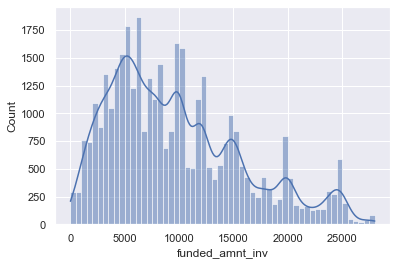

In [380]:
sns.histplot( data = loan_plot , x="funded_amnt_inv" , kde = True)

<AxesSubplot:xlabel='total_pymnt', ylabel='Count'>

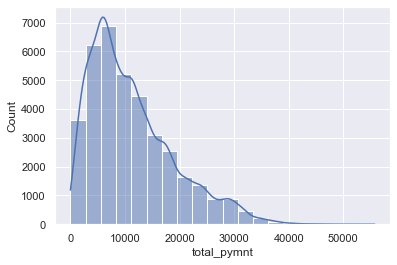

In [381]:
sns.histplot( data = loan_plot , x="total_pymnt" , bins = 20 , kde = True)

In [387]:
import plotly.express as px
#import plotly.graph_obj as pobj 
import plotly.tools as tls


#multivariate Analysis 
fig = px.histogram(loan_stat, x="loan_status", y="total_pymnt", color="home_ownership")
fig.show()


(array([1225., 2535., 3693., 4140., 3699., 3702., 2482., 3355., 2931.,
        1451., 2624., 1209., 1070.,  648., 1415.,  466.,  475., 1262.,
         110.,  158.]),
 array([    0.       ,  1399.8782885,  2799.756577 ,  4199.6348655,
         5599.513154 ,  6999.3914425,  8399.269731 ,  9799.1480195,
        11199.026308 , 12598.9045965, 13998.782885 , 15398.6611735,
        16798.539462 , 18198.4177505, 19598.296039 , 20998.1743275,
        22398.052616 , 23797.9309045, 25197.809193 , 26597.6874815,
        27997.56577  ]),
 <BarContainer object of 20 artists>)

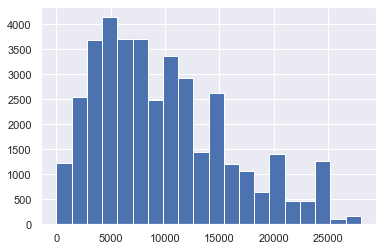

In [360]:
plt.hist(loan_plot.funded_amnt_inv , bins = 20 )

(array([2047., 2538., 3671., 1771., 2449., 4875., 3648., 3660., 3779.,
        2749., 2280., 2300., 1209., 1105.,  669.,  414.,  333.,  143.,
          61.,   16.]),
 array([ 5.42  ,  6.3785,  7.337 ,  8.2955,  9.254 , 10.2125, 11.171 ,
        12.1295, 13.088 , 14.0465, 15.005 , 15.9635, 16.922 , 17.8805,
        18.839 , 19.7975, 20.756 , 21.7145, 22.673 , 23.6315, 24.59  ]),
 <BarContainer object of 20 artists>)

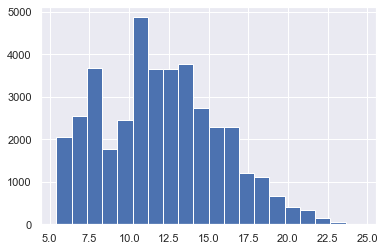

In [354]:
plt.hist(loan_stat.int_rate , bins = 20 )

In [ ]:
total_pymnt

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

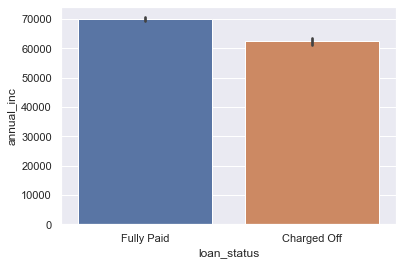

In [273]:
#Loan_stat to be analysed after sanity 
import matplotlib as mpl
import seaborn as sns
#default set for seaborn 
sns.set()
sns.barplot(x = 'loan_status', y = 'annual_inc', data = loan_stat)


<AxesSubplot:xlabel='loan_status', ylabel='term'>

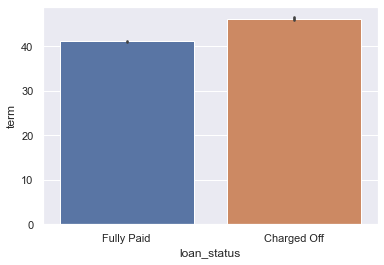

In [252]:
sns.barplot( x = 'loan_status', y = 'term', data = loan_stat)


<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

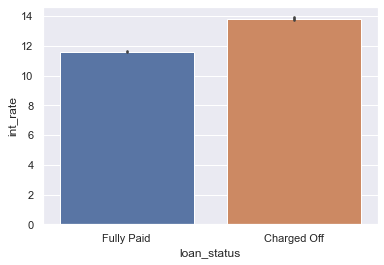

In [253]:
sns.barplot(y = 'int_rate', x = 'loan_status', data = loan_stat)

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

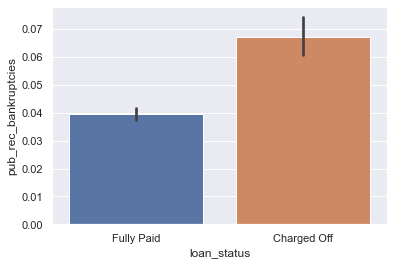

In [288]:
sns.barplot(x = 'loan_status', y = 'pub_rec_bankruptcies' , data = loan_stat  )

In [283]:
print(loan['pub_rec_bankruptcies'].unique())

[ 0.  1.  2. nan]
